MAJOR PROJECT:SKIN CANCER DETECTION USING DEEP LEARNING
UNDER GUIDENCE OF USHA DESHAI 
SR UNIVERSITY

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
import glob
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.regularizers import l2

DATASET

In [2]:
# Defining the path for train and test images

data_dir_train = pathlib.Path("C:/Users/THARUN TEJA/OneDrive/Desktop/dataset/train")
data_dir_test = pathlib.Path("C:/Users/THARUN TEJA/OneDrive/Desktop/dataset/test")

In [3]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

17614
1846


In [4]:
batch_size = 32
img_height = 180
img_width = 180

In [5]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = image_dataset_from_directory(data_dir_train, 
                                        seed = 123, 
                                        image_size=(img_height, img_width), 
                                        validation_split=0.2, 
                                        subset='training')

Found 17614 files belonging to 6 classes.
Using 14092 files for training.


In [6]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = image_dataset_from_directory(data_dir_train, 
                                      seed = 123, 
                                      image_size=(img_height, img_width), 
                                      validation_split=0.2, 
                                      subset='validation')

Found 17614 files belonging to 6 classes.
Using 3522 files for validation.


In [7]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(type(class_names), class_names)


<class 'list'> ['basal cell carcinoma', 'benign melanoma', 'malignant melanoma', 'melanocytic nevi', 'nevus', 'seborrheic keratosis']


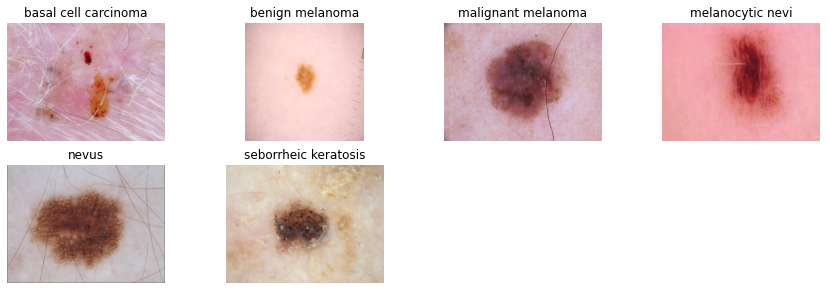

In [8]:
### Visualizing the training data

plt.figure(figsize=(15, 10))

for i, class_ in enumerate(list(class_names)):
    plt.subplot(4, 4, i+1)
    data_path = os.path.join(str(data_dir_train), class_)
    file_path = glob.glob(os.path.join(data_path,'*.jpg'))[0]
    img = PIL.Image.open(file_path)
    plt.imshow(img)
    plt.title(class_)
    plt.axis("off")
plt.show()

In [9]:
for image_batch, labels_batch in train_ds.take(1):
    print(image_batch.shape)
    print(labels_batch.shape)

(32, 180, 180, 3)
(32,)


In [10]:
# Allow gpu usage
gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)
try:
    tf.config.experimental.set_memory_growth = True
except Exception as ex:
    print(e)

[]


In [11]:
data_augmentation = tf.keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [12]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

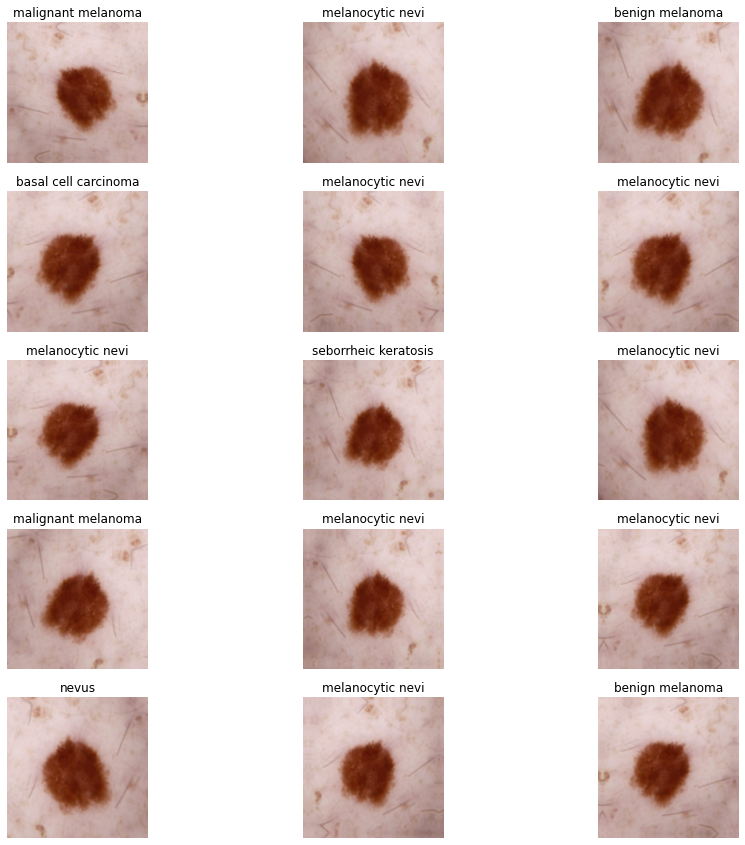

In [13]:
plt.figure(figsize=(15, 15))
for images, label in train_ds.take(1):
    for i in range(15):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(5, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.title(class_names[label[i]])
        plt.axis("off")

In [14]:
num_classes = 9

# Building model with data augmentation and drop out layers
# Model building - Data augmentation -> Rescaling -> Conv2D -> MaxPooling2D -> Conv2D -> MaxPooling2D -> Conv2D -> MaxPooling2D -> Dropout -> Dense -> Dense
model = data_augmentation
model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)))
model.add(Conv2D(16, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(32, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.15))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(num_classes))

In [15]:
## Your code goes here
model.compile(optimizer='adam',
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip (RandomFlip)    (None, 180, 180, 3)       0         
                                                                 
 random_rotation (RandomRota  (None, 180, 180, 3)      0         
 tion)                                                           
                                                                 
 random_zoom (RandomZoom)    (None, 180, 180, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 activation (Activation)     (None, 180, 180, 16)      0         
                                                        

In [17]:
epochs = 15
history = model.fit(train_ds,validation_data=val_ds,epochs=epochs)

Epoch 1/15
441/441 [==============================] - 583s 1s/step - loss: 1.0855 - accuracy: 0.5947 - val_loss: 0.8614 - val_accuracy: 0.6990
Epoch 2/15
441/441 [==============================] - 477s 1s/step - loss: 0.8700 - accuracy: 0.6841 - val_loss: 0.7866 - val_accuracy: 0.7036
Epoch 3/15
441/441 [==============================] - 496s 1s/step - loss: 0.8060 - accuracy: 0.7042 - val_loss: 0.8084 - val_accuracy: 0.7022
Epoch 4/15
441/441 [==============================] - 530s 1s/step - loss: 0.7650 - accuracy: 0.7205 - val_loss: 0.7949 - val_accuracy: 0.7030
Epoch 5/15
441/441 [==============================] - 527s 1s/step - loss: 0.7479 - accuracy: 0.7265 - val_loss: 0.7588 - val_accuracy: 0.7212
Epoch 6/15
441/441 [==============================] - 499s 1s/step - loss: 0.7280 - accuracy: 0.7320 - val_loss: 0.6913 - val_accuracy: 0.7501
Epoch 7/15
441/441 [==============================] - 489s 1s/step - loss: 0.6979 - accuracy: 0.7451 - val_loss: 0.7021 - val_accuracy: 0.7411

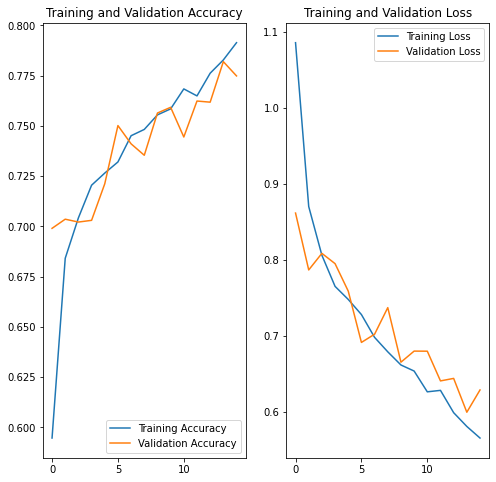

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [25]:
class_size = {}

for name in class_names:
    class_size[name] = len(list(data_dir_train.glob(name+'/*.jpg')))

class_size

{'basal cell carcinoma': 805,
 'benign melanoma': 5000,
 'malignant melanoma': 5000,
 'melanocytic nevi': 5000,
 'nevus': 805,
 'seborrheic keratosis': 1004}

In [26]:
class_df = pd.DataFrame(class_size.items(),index=list(class_size), columns = ['ClassName', 'NumberOfSamples'])
class_df.drop(['ClassName'], axis = 1, inplace=True)
class_df

,NumberOfSamples
basal cell carcinoma,805
benign melanoma,5000
malignant melanoma,5000
melanocytic nevi,5000
nevus,805
seborrheic keratosis,1004


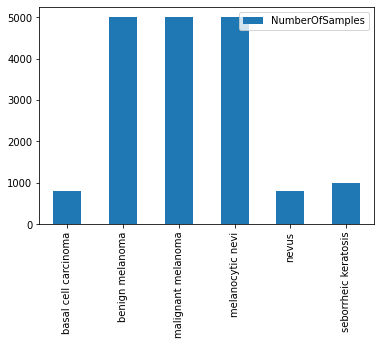

In [27]:
class_df.plot.bar()
plt.show()

In [28]:
test_dataset = image_dataset_from_directory(data_dir_test, image_size=(img_height, img_width), 
                                           batch_size=batch_size)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

Found 1846 files belonging to 6 classes.


Predictions:
 [2 3 2 2 2 2 3 3 3 3 2 2 2 2 2 3 3 3 2 3 2 2 2 2 3 3 3 3 2 2 2 2 2 3 3 3 3
 3 2 2 3 2 3 3 3 3 2 2 2 3 2 3 3 3 3 2 3 2 3 2 3 3 3 3 2 2 2 3 2 3 3 3 3 2
 2 2 2 3 3 3 3 3 2 2 2 3 2 3 3 3 3 2 2 2 3 2 3 3 3 3 2 2 2 3 2 3 3 3 2 3 2
 3 2 2 3 3 3 2 3 2 3 2 2 3 3 3 3 2 3 2 3 2 3 3 3 3 3 2 2 3 2 3 3 3 2 2 2 2
 2 2 3 3 3 3 2 2 2 3 2 3 3 3 2 2 2 2 3 2 3 3 3 3 2 3 3 3 3 3 3 3 3 2 3 2 3
 2 3 3 3 3 3 3 2 3 2 3 3 3 3 2 2 2 2 2 3 3 3 3 2 3 2 3 3 3 3 3 3 2 3 3 3 3
 3 3 3 3 2 2 2 3 2 3 3 3 3 2 2 3 3 3 3 3 3 3 3 2 2 3 2 3 3 3 3 3 2 2 2 2 3
 3 3 3 2 2 2 2 2 3 3 3 3 2 2 2 3 2 3 3 3 3 2 2 3 3 2 3 3 3]
Labels:
 [2 1 2 1 3 5 3 2 1 3 3 2 0 0 3 5 2 2 2 1 3 3 2 1 1 5 1 5 4 2 2 1]


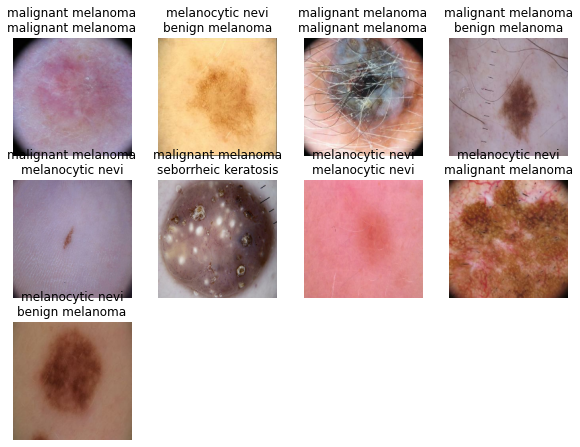

In [52]:
#Retrieve a batch of images from the test set
image_batch, label_batch = test_dataset.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch).flatten()

# Apply a sigmoid since our model returns logits
predictions = tf.nn.sigmoid(predictions)
predictions = tf.where(predictions < 0.8, 3, 2)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(image_batch[i].astype("uint8"))
    plt.title(class_names[predictions[i]] + "\n" + class_names[label_batch[i]])
    plt.axis("off")

Predictions:
 [3 2 2 2 2 2 3 3 3 3 2 2 2 3 2 3 3 3 3 2 2 3 2 3 3 3 3 3 2 2 2 2 2 3 3 3 2
 3 2 2 2 2 3 3 3 2 3 2 2 2 2 3 3 3 2 3 2 2 2 2 3 3 3 3 2 2 2 2 2 3 3 3 3 2
 2 2 2 2 3 3 3 3 2 2 2 2 2 3 3 3 2 3 2 2 2 2 3 3 3 2 2 2 2 2 2 3 3 3 2 2 2
 2 2 2 3 3 3 3 2 2 2 2 2 3 3 3 2 2 2 2 3 2 3 3 3 3 2 2 2 3 3 3 3 3 2 2 2 2
 2 2 3 3 3 3 2 2 2 3 2 3 3 3 3 2 2 2 2 2 3 3 3 3 2 2 2 3 2 3 3 3 3 2 3 3 3
 3 3 3 3 3 2 2 2 3 2 3 3 3 3 2 2 2 2 2 3 3 3 3 2 3 3 3 3 3 3 3 3 2 2 3 3 3
 3 3 3 3 2 2 2 2 2 3 3 3 2 2 2 2 2 2 3 3 3 3 2 2 2 3 2 3 3 3 3 2 2 2 2 2 3
 3 3 3 2 2 2 2 2 3 3 3 3 2 2 3 2 2 3 3 3 2 2 2 2 2 2 3 3 3]
Labels:
 [2 5 1 2 5 0 3 2 3 3 2 2 2 2 3 2 2 5 1 1 1 1 3 1 1 1 2 2 1 1 1 3]


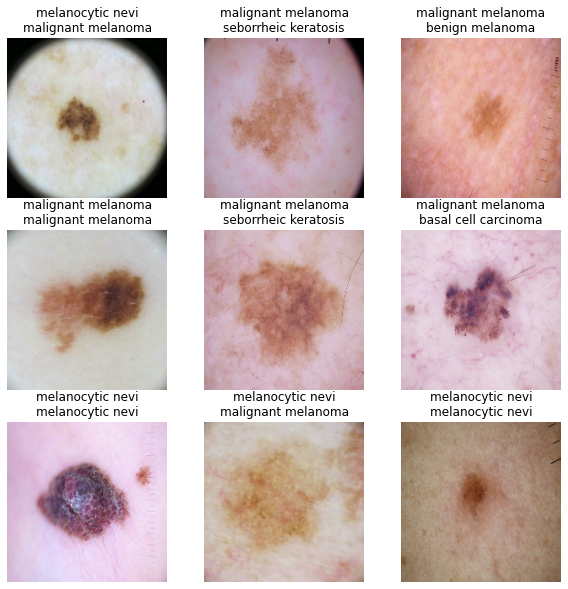

In [56]:
#Retrieve a batch of images from the test set
image_batch, label_batch = test_dataset.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch).flatten()

# Apply a sigmoid since our model returns logits
predictions = tf.nn.sigmoid(predictions)
predictions = tf.where(predictions < 0.5, 3, 2)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image_batch[i].astype("uint8"))
    plt.title(class_names[predictions[i]] + "\n" + class_names[label_batch[i]])
    plt.axis("off")

Predictions:
 [1 3 3 3 1 3 1 1 1 1 3 3 3 1 3 1 1 1 1 3 3 3 1 3 1 1 1 1 3 3 3 1 3 1 1 1 1
 3 3 1 1 3 1 1 1 1 3 3 3 3 3 1 1 1 1 3 3 3 1 3 1 1 1 1 3 1 3 1 3 1 1 1 1 3
 3 3 1 3 1 1 1 1 3 3 3 3 3 1 1 1 1 3 3 3 3 3 1 1 1 1 3 1 3 1 3 1 1 1 1 3 1
 3 1 3 1 1 1 1 3 1 1 1 1 1 1 1 1 3 3 3 3 3 1 1 1 1 3 1 3 1 3 1 1 1 1 3 3 3
 1 1 1 1 1 3 1 3 3 3 3 1 1 1 1 1 3 3 3 3 1 1 1 1 3 3 1 1 1 1 1 1 3 3 3 3 1
 3 1 1 1 1 3 1 3 1 3 1 1 1 1 3 1 1 1 1 1 1 1 1 3 3 1 1 3 1 1 1 1 3 3 3 3 3
 1 1 1 3 3 3 3 3 3 1 1 1 1 3 3 3 1 3 1 1 1 1 3 1 1 1 1 1 1 1 1 3 3 3 3 1 1
 1 1 1 3 3 3 1 1 1 1 1 1 3 3 1 1 3 1 1 1 1 1 3 3 3 3 1 1 1]
Labels:
 [2 3 2 2 2 3 1 3 3 2 2 3 3 1 2 3 1 5 3 1 2 3 1 1 1 2 3 1 1 1 1 3]


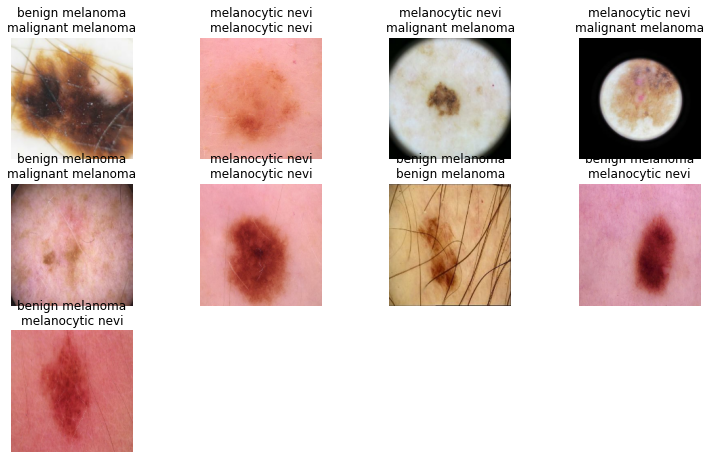

In [64]:
#Retrieve a batch of images from the test set
image_batch, label_batch = test_dataset.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch).flatten()

# Apply a sigmoid since our model returns logits
predictions = tf.nn.sigmoid(predictions)
predictions = tf.where(predictions < 0.8, 1, 3)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

plt.figure(figsize=(13, 13))
for i in range(9):
    ax = plt.subplot(5, 4, i + 1)
    plt.imshow(image_batch[i].astype("uint8"))
    plt.title(class_names[predictions[i]] + "\n" + class_names[label_batch[i]])
    plt.axis("off")

Predictions:
 [1 3 3 3 3 3 1 1 1 1 3 3 3 3 3 1 1 1 1 1 3 3 3 3 1 1 1 1 3 1 3 1 3 1 1 1 1
 3 3 3 1 3 1 1 1 1 3 3 3 1 1 1 1 1 1 3 3 1 1 3 1 1 1 1 3 3 3 3 3 1 1 1 1 3
 3 1 1 1 1 1 1 1 3 1 3 1 3 1 1 1 1 3 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 3 3 3
 3 1 3 1 1 1 1 3 3 1 1 1 1 1 1 1 1 1 3 1 3 1 1 1 1 1 1 3 1 3 1 1 1 1 1 3 3
 3 1 1 1 1 1 3 1 3 1 1 1 1 1 1 3 3 1 1 1 1 1 1 1 3 3 3 1 3 1 1 1 1 1 3 3 1
 3 1 1 1 3 1 1 1 3 1 1 1 1 1 3 1 3 1 3 1 1 1 1 3 3 1 3 1 1 1 1 1 3 3 3 3 3
 1 1 1 1 3 3 3 1 3 1 1 1 1 3 3 3 1 1 1 1 1 1 1 3 3 3 3 1 1 1 1 3 3 3 3 3 1
 1 1 1 3 1 3 1 3 1 1 1 1 3 1 1 1 1 1 1 1 1 1 3 3 3 3 1 1 1]
Labels:
 [2 2 3 3 2 2 1 2 1 3 1 0 2 2 3 3 3 3 1 2 5 0 3 1 2 2 2 2 2 3 1 4]


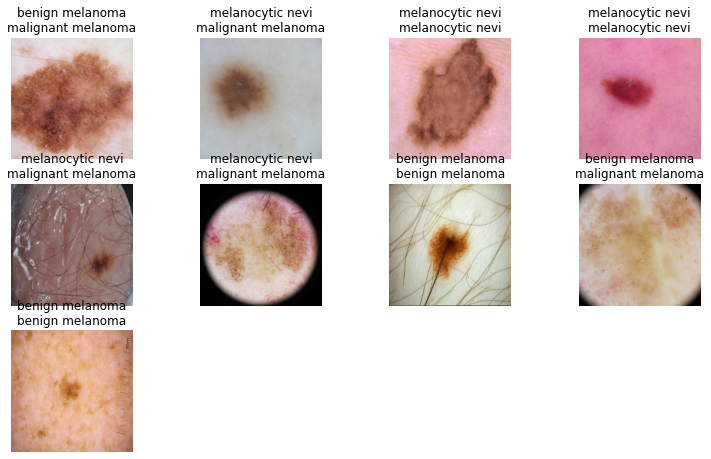

In [65]:
#Retrieve a batch of images from the test set
image_batch, label_batch = test_dataset.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch).flatten()

# Apply a sigmoid since our model returns logits
predictions = tf.nn.sigmoid(predictions)
predictions = tf.where(predictions < 0.9, 1, 3)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

plt.figure(figsize=(13, 13))
for i in range(9):
    ax = plt.subplot(5, 4, i + 1)
    plt.imshow(image_batch[i].astype("uint8"))
    plt.title(class_names[predictions[i]] + "\n" + class_names[label_batch[i]])
    plt.axis("off")

Predictions:
 [1 0 0 0 0 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 0
 1 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 0 1 1 1 0 1 0 0 1 0 1 1 1 1 0
 0 0 1 0 1 1 1 0 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0 0 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 0 1 0 0 1 0 1 1 1 1 0 0 0 1 0 1 1 1 1 0 0 0
 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 0 1
 0 1 1 1 1 0 0 0 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0
 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 0 0 0 1 1 1 1 0 1 0 1 1 1 1 1 0 0 0 1 0 0 1
 1 1 1 1 0 0 1 0 1 1 1 1 0 0 0 0 0 1 1 1 1 0 0 0 1 1 1 1 1]
Labels:
 [2 1 3 2 2 3 1 5 3 0 4 5 1 3 2 2 1 1 1 1 3 2 0 2 5 1 3 1 0 3 2 1]


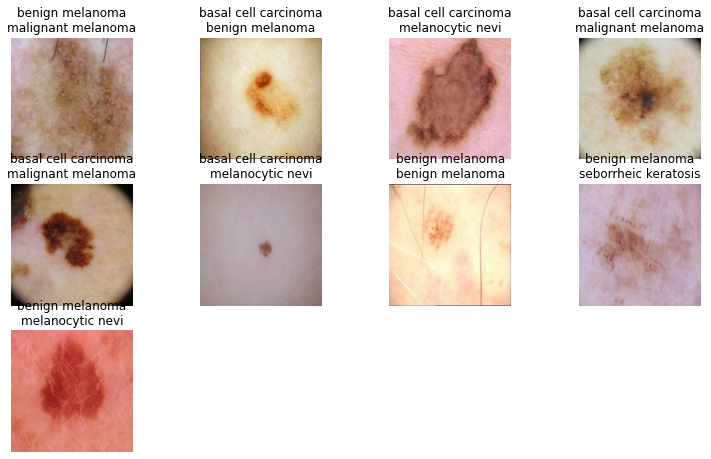

In [67]:
#Retrieve a batch of images from the test set
image_batch, label_batch = test_dataset.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch).flatten()

# Apply a sigmoid since our model returns logits
predictions = tf.nn.sigmoid(predictions)
predictions = tf.where(predictions < 0.8, 1, 0)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

plt.figure(figsize=(13, 13))
for i in range(9):
    ax = plt.subplot(5, 4, i + 1)
    plt.imshow(image_batch[i].astype("uint8"))
    plt.title(class_names[predictions[i]] + "\n" + class_names[label_batch[i]])
    plt.axis("off")

Predictions:
 [0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Labels:
 [2 1 3 4 3 2 0 2 2 2 1 2 1 0 1 5 3 1 1 1 2 5 3 5 1 2 3 3 2 2 2 0]


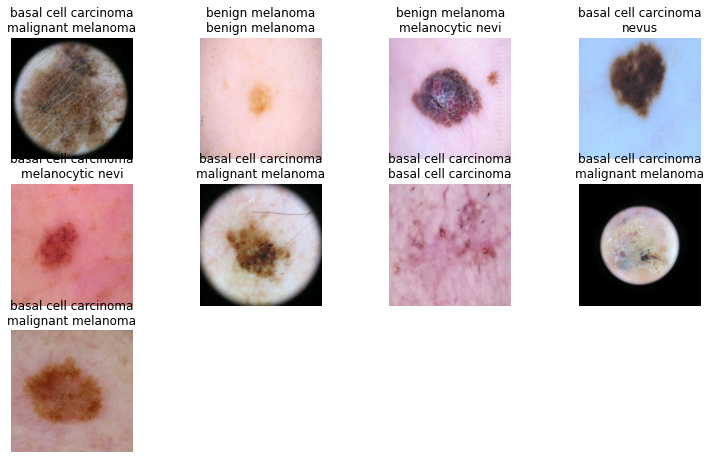

In [70]:
#Retrieve a batch of images from the test set
image_batch, label_batch = test_dataset.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch).flatten()

# Apply a sigmoid since our model returns logits
predictions = tf.nn.sigmoid(predictions)
predictions = tf.where(predictions < 1, 0, 1)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

plt.figure(figsize=(13, 13))
for i in range(9):
    ax = plt.subplot(5, 4, i + 1)
    plt.imshow(image_batch[i].astype("uint8"))
    plt.title(class_names[predictions[i]] + "\n" + class_names[label_batch[i]])
    plt.axis("off")

In [72]:
model.save("tharun.h5")